# WeChat group "WWG West Resident 林茵西住户"

## 1-IMPORT DATA & CREATE A CLEAN FILE

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
data = pd.read_table('residents1.txt',delimiter="                     ",error_bad_lines=False, encoding = 'ANSI')
pd.set_option("max_colwidth", 1000)
data.sample(5)

C:\Users\titre\AppData\Roaming\Python\Python38\site-packages\pandas\io\parsers.py:767: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())
Skipping line 12549: Expected 1 fields in line 12549, saw 2. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 12605: Expected 1 fields in line 12605, saw 2. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 12697: Expected 1 fields in line 12697, saw 2. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 12743: Expected 1 fields in line 12743, saw 2. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 12883: Expected 1 fields in li

,"The chatting history for this WeChat group ""WWG West Resident 林茵西住户"" is shown below."
2806,15. W108-301 Patty +1
8927,[Contact Card: 郭和芬18911336959]
3979,电话13003192421沈先生，被子有，饭菜外卖这几天没法送到
7730,是否明天解封啊
7243,27. Hyoungmi W41


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11867 entries, 0 to 11866
Data columns (total 1 columns):
 #   Column                                                                                Non-Null Count  Dtype 
---  ------                                                                                --------------  ----- 
 0   The chatting history for this WeChat group "WWG West Resident 林茵西住户" is shown below.  11867 non-null  object
dtypes: object(1)
memory usage: 92.8+ KB


In [4]:
data['Chats'] = data['The chatting history for this WeChat group "WWG West Resident 林茵西住户" is shown below.'].apply(str)

In [5]:
#step1 IDENTIFY DATE and INPUT AS COLUMN
data['Date'] = data['Chats'].str.contains('—————  2022')
data.head(3)

,"The chatting history for this WeChat group ""WWG West Resident 林茵西住户"" is shown below.",Chats,Date
0,————— 2022-03-15 —————,————— 2022-03-15 —————,True
1,Kiran Chandra 07:40,Kiran Chandra 07:40,False
2,Good morning does anyone know a center for testing that doesn’t have these long lines?,Good morning does anyone know a center for testing that doesn’t have these long lines?,False


In [6]:
data['Date'] = data[data['Chats'].str.contains('—————  2022')]
data.head(3)

,"The chatting history for this WeChat group ""WWG West Resident 林茵西住户"" is shown below.",Chats,Date
0,————— 2022-03-15 —————,————— 2022-03-15 —————,————— 2022-03-15 —————
1,Kiran Chandra 07:40,Kiran Chandra 07:40,NaN
2,Good morning does anyone know a center for testing that doesn’t have these long lines?,Good morning does anyone know a center for testing that doesn’t have these long lines?,NaN


In [7]:
#can confirm that we have all date?
data['Date'].unique()

array(['—————  2022-03-15  —————', nan, '—————  2022-03-16  —————',
       '—————  2022-03-17  —————', '—————  2022-03-18  —————',
       '—————  2022-03-19  —————', '—————  2022-03-20  —————',
       '—————  2022-03-21  —————', '—————  2022-03-22  —————',
       '—————  2022-03-23  —————', '—————  2022-03-24  —————',
       '—————  2022-03-25  —————', '—————  2022-03-26  —————',
       '—————  2022-03-27  —————', '—————  2022-03-28  —————',
       '—————  2022-03-29  —————', '—————  2022-03-30  —————',
       '—————  2022-03-31  —————'], dtype=object)

In [8]:
#clean date format, get rid of 6 first and 6 last characters
data['Date'] = data['Date'].str.slice(start=7, stop=-7)
data['Date'].unique()

array(['2022-03-15', nan, '2022-03-16', '2022-03-17', '2022-03-18',
       '2022-03-19', '2022-03-20', '2022-03-21', '2022-03-22',
       '2022-03-23', '2022-03-24', '2022-03-25', '2022-03-26',
       '2022-03-27', '2022-03-28', '2022-03-29', '2022-03-30',
       '2022-03-31'], dtype=object)

In [9]:
#forward fill all dates 
data['Date']= data['Date'].ffill()
data.head(3)

,"The chatting history for this WeChat group ""WWG West Resident 林茵西住户"" is shown below.",Chats,Date
0,————— 2022-03-15 —————,————— 2022-03-15 —————,2022-03-15
1,Kiran Chandra 07:40,Kiran Chandra 07:40,2022-03-15
2,Good morning does anyone know a center for testing that doesn’t have these long lines?,Good morning does anyone know a center for testing that doesn’t have these long lines?,2022-03-15


In [10]:
#change format from object to date
data['Date']= pd.to_datetime(data['Date'])
data['Date'].dtypes

dtype('<M8[ns]')

In [11]:
#finally deleting the 6 rows that had only the date to clean database
data["Chats"].str.contains('—————  2022')

0         True
1        False
2        False
3        False
4        False
         ...  
11862    False
11863    False
11864    False
11865    False
11866    False
Name: Chats, Length: 11867, dtype: bool

In [12]:
data = data[data["Chats"].str.contains('—————  2022') == False]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11850 entries, 1 to 11866
Data columns (total 3 columns):
 #   Column                                                                                Non-Null Count  Dtype         
---  ------                                                                                --------------  -----         
 0   The chatting history for this WeChat group "WWG West Resident 林茵西住户" is shown below.  11850 non-null  object        
 1   Chats                                                                                 11850 non-null  object        
 2   Date                                                                                  11850 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 370.3+ KB


In [13]:
data = data[['Chats','Date']]
data.head(3)

,Chats,Date
1,Kiran Chandra 07:40,2022-03-15
2,Good morning does anyone know a center for testing that doesn’t have these long lines?,2022-03-15
3,幸子(Grace) 07:52,2022-03-15


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11850 entries, 1 to 11866
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Chats   11850 non-null  object        
 1   Date    11850 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 277.7+ KB


## 2-PREPROCESS DATA TO GET A TABLE WITH DATE TIME NAME CHAT

### 2.1 SPLIT EVERY 2 ROWS between NAME and TIME

In [15]:
#extracting time to new column
time = []

for i in data.Chats:
    if i[-3:-2] == ':':
        res = i[-5:]
    else : 
        res = ""
    time.append(res)   
    
len(time)

11850

In [16]:
data["Time"] = time
data.sample(10)

,Chats,Date,Time
1617,我想要西芹，谢谢,2022-03-19,
566,陈洁 10:42,2022-03-16,10:42
11319,Laeτισ 立夏  11:09,2022-03-31,11:09
7430,1. House 103,2022-03-24,
50,Really Really?,2022-03-15,
6334,今天不用鼻子，开心,2022-03-24,
8846,Jenny 21:50,2022-03-25,21:50
4834,刚刚全家买的牛奶，和其他平台买重了，有人需要吗？三盒加跑腿费74元[Lol],2022-03-22,
4558,Julia C. 12:58,2022-03-21,12:58
10031,#Group Note,2022-03-29,


In [17]:
#STEP 3 : if time is not null, extract anything before time to get name

In [18]:
name = []

for i in data.Chats:
    if i[-3:-2] == ':':
        res = i[:-5]
    else : 
        res = ""
    resu = res 
    name.append(res)   
    
len(name)

11850

In [19]:
data['Name'] = name
data.sample(20)

,Chats,Date,Time,Name
4529,[Images: 8b7d989690d6bbf995a33804cf513376.jpg(View in attachment)],2022-03-21,,
2804,13. 51号 1篮,2022-03-20,,
1155,那就滴滴专车也可以了！,2022-03-17,,
11227,[App message: 哔哩哔哩],2022-03-31,,
11229,THANK you for gently reminding us of the importance of self- care. I have so enjoyed watching our neighborhood become alive- kids playing together- pets playing together- neighbors playing- walking - talking- helping.- https://www.csusignal.com/wellness/article_8404bf98-aa31-11ec-ad84-9f77856b1527.html,2022-03-31,,
7507,34. Fintje 127,2022-03-24,,
5535,丹丹 08:38,2022-03-23,08:38,丹丹
8479,@雯彬56������ 收到牛奶了，非常感谢[Heart]也谢谢物业和保安,2022-03-25,,
7691,Jack 19:07,2022-03-24,19:07,Jack
2898,18. Audrey W69 1篮,2022-03-20,,


In [20]:
#STEP 4 move the name and time down 1 row and fill forward

In [21]:
data['time'] = data['Time'].shift(1)
data['name'] = data['Name'].shift(1)
data.sample(20)

,Chats,Date,Time,Name,time,name
10023,3. 刘晰-W106-201 6,2022-03-29,,,,
3445,这意思就是目前小区里安全了，但是又出不去，现在一封就是一个街道了,2022-03-20,,,12:14,Jenny
7504,31. Amy_W70,2022-03-24,,,,
10824,瘦不下来的LU 12:10,2022-03-30,12:10,瘦不下来的LU,,
11029,@����Faviana�� W83 派送的单子显示两箱都送到了。还能再找找吗？难道是拿错了。[Facepalm],2022-03-30,,,18:42,Jing
11556,Julia Steffens 13:45,2022-03-31,13:45,Julia Steffens,,
7088,21. Grace_ 105-102,2022-03-24,,,,
11105,@Susan #125 I will take one,2022-03-30,,,19:55,SooLeng
8441,上面写2-6度,2022-03-25,,,14:45,Amy��
3070,18. Brenda 110-402 1篮,2022-03-20,,,,


In [22]:
data.fillna(method='ffill')
data.sample(20)

,Chats,Date,Time,Name,time,name
4885,Sharry 10:29,2022-03-22,10:29,Sharry,,
5737,拉你们进群,2022-03-23,,,13:31,幸子(Grace)
11414,刘倩Lucia 12:33,2022-03-31,12:33,刘倩Lucia,12:32,刘倩Lucia
8528,雯彬������ 17:18,2022-03-25,17:18,雯彬������,,
9979,Jia可 08:45,2022-03-29,08:45,Jia可,,
5284,https://zt.changjing.com.cn/map/viewer?mid=d3vYDHfujJIkll_WdQ9Hcw,2022-03-22,,,,
4131,I’ll bring winter clothes to the gate,2022-03-20,,,20:00,Ally wang
3439,周边有小区有人核酸没做，全小区重新核酸，希望我们没有这样问题,2022-03-20,,,12:05,Jenny
2639,15. W108-301 Patty +1,2022-03-20,,,,
6218,丹丹 09:18,2022-03-24,09:18,丹丹,,


In [23]:
#drop the line to keep only chat, name, time, date
data['name'].replace('', np.nan, inplace=True)
data.dropna(subset=['name'], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4452 entries, 2 to 11866
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Chats   4452 non-null   object        
 1   Date    4452 non-null   datetime64[ns]
 2   Time    4452 non-null   object        
 3   Name    4452 non-null   object        
 4   time    4452 non-null   object        
 5   name    4452 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 243.5+ KB


In [24]:
data = data[['Date','time','name','Chats']]
data.sample(20)

,Date,time,name,Chats
5167,2022-03-22,18:50,Jack,[Images: 2100b7744daa5e698a4eb19fd0c31e55.jpg(View in attachment)]
4954,2022-03-22,11:43,Julia C.,@Chloe#105-402 pls ask the new neighbor you invited just now to mark house #. Thanks
8447,2022-03-25,14:50,雯彬������,2-6度冷藏
1080,2022-03-17,14:40,老韓,可以
6104,2022-03-23,19:39,Cath Thai,@Faye 徐菲 137 West can I hv lettuce
5707,2022-03-23,13:23,幸子(Grace),[Images: 47e8297bb3ed1dc16c2fc5989103f613.jpg(View in attachment)]
10982,2022-03-30,17:41,刘倩Lucia,我们吃的所有的苹果运输都来自这家中介的帮助，昨日他们忙到深夜，非常感谢他们
9642,2022-03-28,07:31,Agnes,有一个解封的时间4月5号
11791,2022-03-31,21:52,Cathy,@Hasan Turkmen W24
10524,2022-03-29,23:37,Lea ��冯,#接龙


### WE NOW HAVE A CLEAN DATABASE TO START WORKING WITH

In [25]:
#the index of the data DF is messed up we need to reset 
data = data.reset_index(drop=True)
data.head()

,Date,time,name,Chats
0,2022-03-15,07:40,Kiran Chandra,Good morning does anyone know a center for testing that doesn’t have these long lines?
1,2022-03-15,07:52,幸子(Grace),Same question here [Drool][Drool][Drool]
2,2022-03-15,08:11,Wai,Wai 08:12
3,2022-03-15,08:12,Wai,This clinic used to offer quick test. But not sure if they still do. Cost is about rmb280
4,2022-03-15,08:13,Wai,"Shanghai United also offer NAT for RMB280. Hence, no line at all. I suppose all the private western hospitals offer similar express services but just at higher costs"


### 2.2 PROCESS DATA WITH LANGUAGE DETECTION

In [26]:
data.Chats[1]

'Same question here [Drool][Drool][Drool]'

In [27]:
text = data.Chats[1]

In [28]:
#function to iterate through rws and detect lang

import fasttext

PRETRAINED_MODEL_PATH = 'lid.176.bin'
model = fasttext.load_model(PRETRAINED_MODEL_PATH)

lang = []
for i in data.Chats:
    predictions = model.predict(i)
    pred = predictions[0][0][-2:]
    lang.append(pred)   


In [29]:
# #name country lang
# from pycountry import languages

# lang_name = languages.get(alpha_2='en').name
# print(lang_name)

In [30]:
data['lang'] = lang
data.sample(10)

,Date,time,name,Chats,lang
3804,2022-03-29,13:11,Agnes,今天有核酸？有没有开始？,zh
804,2022-03-19,17:15,Julia Steffens,"Yes, please come to house 10 to collect when you are ready.",en
3616,2022-03-28,11:17,Agnes,"Try to use it but cannot manage to choose the delivery date and time, not sure if something linked to me or a generic issue",en
4315,2022-03-31,13:57,李敏,我放门口了,zh
334,2022-03-16,12:31,顾蔚 Wei Gu,有两个地方检测，门口一个，原来物业那里一个。,uu
2555,2022-03-24,11:19,Nelson Liu,#接龙 牛奶/milk,zh
2814,2022-03-24,21:11,丹丹,龙上吗？,zh
4133,2022-03-31,09:55,Jing��,第一条也正在找官方来源[Hurt]希望到时候别还是以街道为单位，这样我们真的解不了了,zh
3175,2022-03-25,21:39,李玮捷,不过也是特殊时期，大家也都保护好自己，不出家门也算是为抗疫做贡献了[Hey],zh
4367,2022-03-31,20:30,丹丹,还是不能出小区,zh


In [31]:
#clean wrong languages
for row in data.lang:
    if row != 'en':
        if row != 'zh':
            row = data.lang.replace(row,'zh', inplace = True)
data.sample(20)

,Date,time,name,Chats,lang
4431,2022-03-31,21:57,丹丹,不要有漏网之鱼,zh
1082,2022-03-20,11:24,Audrey程喜梅,请问买菜群有吗？ 拉一下[抱拳],zh
4380,2022-03-31,21:08,丹丹,防控区上不是写了,zh
1198,2022-03-20,13:24,Jenny,@Danielle Sheppard 106W yest,en
1309,2022-03-20,18:58,Jenny,我可以给他送后天午饭,zh
340,2022-03-16,12:38,Phil Laverick,My son is 8 and did nose and throat,en
1901,2022-03-22,18:16,Jenny,[呲牙][呲牙],zh
3523,2022-03-27,20:58,Ally,到4/5吗？,zh
1027,2022-03-20,10:50,Angela ������,好可怜呀,zh
3674,2022-03-28,19:26,Grace Gao (高韵),Manisha Monga 19:37,en


In [32]:
#NOW GET SOME DATA OVER LANGUAGE AND TYPE SHARED

comment = data.loc[data['lang'] == 'zh']
comment

,Date,time,name,Chats,lang
5,2022-03-15,08:15,Lea��冯,15370756151,zh
11,2022-03-15,08:38,幸子(Grace),@Wai_W105-101 @Lea W155 [Rose][Rose]thanks,zh
19,2022-03-15,11:44,Angelina����,when?,zh
32,2022-03-15,11:49,Xing Zhao,小区封了吗[Facepalm],zh
36,2022-03-15,11:51,Angelina����,@Danielle Sheppard 106W [CoolGuy][Hug],zh
...,...,...,...,...,...
4447,2022-03-31,22:35,Julia C.,62206328,zh
4448,2022-03-31,22:35,Cathy,谢谢[Salute],zh
4449,2022-03-31,22:36,李敏,这个是会所的？,zh
4450,2022-03-31,22:37,Julia C.,门卫的,zh


### 2.3 TRANSLATE ALL TO ENGLISH with GOOGLE TRANS

In [34]:
from googletrans import Translator
text = data['Chats'][3698]
tl = Translator()
dt1 = tl.detect(text)
print(dt1)

Detected(lang=zh-CN, confidence=None)


In [35]:
dt1.lang

'zh-CN'

In [36]:
dt2 = tl.translate(text)
print(dt2.src)
print(dt2.dest)
print(dt2.origin)
print(dt2.text)

zh-CN
en
通知：政府为封控期间涉外小区生活物资购买渠道多样化，特别开通相关自助买菜链接，有需要的业主和住客可以看一下。
Notice: The government is diversified by the living materials for foreign-bearing communities during the prevention period, and specially opened the relevant self-service buying chain links, and the owners and guests need to see it.


In [37]:
# from googletrans import Translator

# lang2 = []
# tl = Translator()

# for i in data.Chats:
#     p = tl.translate(i)
#     pr = p.text
#     lang2.append(p)   

# lang2[1]

In [38]:
from deep_translator import GoogleTranslator

In [39]:
tr = GoogleTranslator(target='en')

#languages_list = []
#lang_map = tr.get_supported_languages(as_dict=True) # Get in form of dict

# for i in lang_map.items():
#     languages_list.append(key.title()) # Making first letter capital with title()


### 2.3bis TRANSLATE ALL IN ENGLISH with PY TRANSLATE

In [40]:
#testing for 1 msg
from translate import Translator
tl= Translator(to_lang="en",from_lang='zh') 

done = tl.translate(data['Chats'][32])
done

'Is anyone there? [Facepalm]'

In [41]:
#iterating through data
# data['msg'] = data['Chats'].apply(lambda x : tl.translate(x) if data['lang']=='zh' else x)
en_msg = []
for x in data['Chats']:
    if i == 'zh' in data['lang']:
        done = tl.translate(x)
        en_msg.append(done)
    else:
        en_msg.append(x)
en_msg

['Good morning does anyone know a center for testing that doesn’t have these long lines?',
 'Same question here [Drool][Drool][Drool]',
 'Wai  08:12',
 'This clinic used to offer quick test. But not sure if they still do. Cost is about rmb280',
 'Shanghai United also offer NAT for RMB280. Hence, no line at all. I suppose all the private western hospitals offer similar express services but just at higher costs',
 '15370756151',
 'Lea��冯  08:18',
 '[Images: 77c69ae7a8d53fd48169f13927c4ecd6.jpg(View in attachment)]',
 'Good morning parents. Thinking of you as we start this journey. A gentle reminder for us and our kiddos: try not to stress if tech fails us and things don\'t go as planned. We don\'t have to accomplish anything beyond checking in and making sure everyone knows what to do. It is only day 1 (or 2 for some) and we have time to work out the kinks. Several kids will get stressed out if they can\'t figure things out right away.... and us too. Be gentle with them and with yourselv

In [42]:
# #testing why not all was translated
# tes = tl.translate('@宋叶萍\u2005有确诊怎么会是48小时呢？')
# tes

RuntimeError: generator raised StopIteration

In [43]:
#py translate has a limit on translations TRANSLATION_API_MAX_LENGHT

### 2.4 CREATE CATEGORY MESSAGE TYPE ie IMAGES, REPLY..

In [44]:
#create a function for categorizing between image, reply, questions...
def typo(x):
    if x.startswith('[Images: '):
        return 'image'
    elif x.startswith('@'):
        return 'reply'
    elif "?" in x:
        return 'question'
    else:
        return ''


In [45]:
data['typo'] = data['Chats'].apply(lambda x : typo(x))
data.sample(20)

,Date,time,name,Chats,lang,typo
3274,2022-03-26,13:08,monica albertini,[Images: 95617d299927a634b18964e84d207ca5.jpg(View in attachment)],en,image
566,2022-03-17,16:58,Betty,那就滴滴专车也可以了！,zh,
1713,2022-03-21,16:04,幸子(Grace),[Sticker],en,
660,2022-03-18,15:56,丹丹,[Images: 72f6630ef40adae9de6a3ce5d1be0cba.jpg(View in attachment)],en,image
2814,2022-03-24,21:11,丹丹,龙上吗？,zh,
914,2022-03-19,20:32,顾蔚 Wei Gu,[Images: f7889268cdbe12c711a95eee1196c732.temp.jpg(View in attachment)],en,image
1106,2022-03-20,11:53,幸子(Grace),Me too!,en,
4243,2022-03-31,12:47,丹丹,政府出台政策应该是有原因的,zh,
1313,2022-03-20,19:00,Jia可,我就住隔壁，明天我们可以送去,zh,
4202,2022-03-31,12:13,平安是福,现在接到的政府通知的防疫措施是确定的，而且政府也要求严格执行，我也透露个小事情，政府现在正在用无人机进行小区高空巡逻，后续政府肯定要出台一些政策来处理不执行相关防疫防控政策的方法，我们是建议大家再忍一忍，看看这几天后续事情走向吧,zh,


### 2.5 CATEGORY MESSAGE STANCE - VOCAB used

In [46]:
#from the google trans = get main theme of the msg when not already in typo column

## 3-LETS VISUALIZE SOME DATA : 

### MOST POSTERS - PEOPLE SHARING

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [48]:
data.describe()

C:\Users\titre\AppData\Local\Temp/ipykernel_11904/3175101911.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe()


,Date,time,name,Chats,lang,typo
count,4452,4452,4452,4452,4452,4452
unique,17,939,158,4044,2,4
top,2022-03-20 00:00:00,09:12,Jenny,#接龙,zh,
freq,526,18,346,81,3008,3448
first,2022-03-15 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2022-03-31 00:00:00,NaN,NaN,NaN,NaN,NaN


In [49]:
data.describe().name.top

C:\Users\titre\AppData\Local\Temp/ipykernel_11904/3074080641.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe().name.top


'Jenny  '

In [50]:
print('Number of days studied : ', data.Date.nunique())
print('Total nb of msg sent : ', data.Chats.count())
print('Number of unique participants speaking : ', data.name.nunique())
print('Top speaker among residents : ', data.describe().name.top, ' with a total of ', data.describe().name.freq, ' messages')
print('Most language used: ', data.describe().lang.top)

C:\Users\titre\AppData\Local\Temp/ipykernel_11904/3978776079.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print('Top speaker among residents : ', data.describe().name.top, ' with a total of ', data.describe().name.freq, ' messages')
C:\Users\titre\AppData\Local\Temp/ipykernel_11904/3978776079.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print('Top speaker among residents : ', data.describe().name.top, ' with a total of ', data.describe().name.freq, ' messages')


Number of days studied :  17
Total nb of msg sent :  4452
Number of unique participants speaking :  158
Top speaker among residents :  Jenny    with a total of  346  messages
Most language used:  zh


C:\Users\titre\AppData\Local\Temp/ipykernel_11904/3978776079.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print('Most language used: ', data.describe().lang.top)


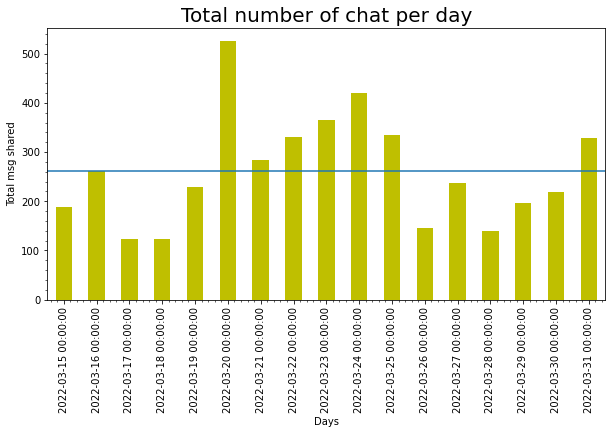

In [51]:
#plot total number of chat per day
days = data.groupby('Date')['Chats'].count()
fig,ax= plt.subplots()
days.plot(kind = 'bar',ax=ax, color='y',figsize=(10,5))

plt.minorticks_on()
ax.tick_params(axis='x',which='minor',bottom='off')
ax.set_xlabel("Days")
ax.set_ylabel("Total msg shared")
ax.set_title(("Total number of chat per day"), fontsize=20)

# use axhline
mean = days.mean()
ax.axhline(mean)

In [52]:
days.describe()
print('we averaged shared ',days.describe().mean(),' chats per day with a min of ', days.describe().min(),' and a max on sunday of ',days.describe().max(),' chats') 

we averaged shared  224.6202572544861  chats per day with a min of  17.0  and a max on sunday of  526.0  chats


In [53]:
#plot number of chats per name over period
mostvocal = data['name'].value_counts().sort_values(ascending = False)
mostvocal.nlargest(10)

Jenny            346
幸子(Grace)        272
Jack             206
丹丹               203
Susan Lu         160
Rachel           158
Betty            142
Xing Zhao        140
雯彬������         134
陈浩 Chen Hao      115
Name: name, dtype: int64

In [54]:
#most vocal per day 
mostvocalday = data.groupby('Date')['name'].apply(lambda x: x.value_counts().head(1))
mostvocalday

Date                     
2022-03-15  Jenny            17
2022-03-16  Xing Zhao        28
2022-03-17  宋叶萍              15
2022-03-18  雯彬������         12
2022-03-19  陈浩 Chen Hao      20
2022-03-20  Jenny            70
2022-03-21  Jenny            48
2022-03-22  Jack             38
2022-03-23  Jenny            57
2022-03-24  Jenny            49
2022-03-25  雯彬������         33
2022-03-26  Susan Lu         16
2022-03-27  雯彬������         22
2022-03-28  Simei            14
2022-03-29  Rachel           15
2022-03-30  Susan Lu         21
2022-03-31  幸子(Grace)        31
Name: name, dtype: int64

## GOV ANALYSIS

In [55]:
#GOV BEEN AT MENTIONNED
gov = data[data['Chats'].str.contains('@宋叶萍') == True]
gov

,Date,time,name,Chats,lang,typo
158,2022-03-15,21:07,陈浩 Chen Hao,@宋叶萍 请问是因为小区有密接吗？,zh,reply
166,2022-03-15,21:13,顾蔚 Wei Gu,@宋叶萍 谢谢宋主任，清晰透明的介绍。请问确诊者是在小区还是隔离发现？确诊邻居何时离开了小区？是否全家已经离开？我们小区其他居民万一也有异常，是否也要全家马上被带走？需要提前准备箱子吗？抱歉问题有点多，看您时间酌情回答哈。,zh,reply
172,2022-03-15,21:52,雯彬������,@宋叶萍 有确诊怎么会是48小时呢？,zh,reply
173,2022-03-15,21:54,Betty,你好，請問一下是確診人士和其家人是於那一天被送離小區的？方便透露一下嗎？@宋叶萍,zh,
175,2022-03-15,22:04,雯彬������,@宋叶萍 确诊的是阿姨吗？,zh,reply
...,...,...,...,...,...,...
3042,2022-03-25,17:51,Susan Lu,我们都是阴性是不是小区应该解封了@宋叶萍,zh,
3098,2022-03-25,19:51,Rachel,我想确定一下，我们是否要再封14天@宋叶萍,zh,
3397,2022-03-27,10:18,Betty,@宋叶萍 书记好，请问我们下一步是什么？请问有消息吗？昨天做完了检测之后是什么？能提供一下消息吗？谢谢,zh,reply
3966,2022-03-30,13:30,Julia C.,@宋叶萍 @金地物业-王文渊 我们小区是否也会收到Costco熊猫爱心礼包啊 A还是B？好期待,zh,reply


### TOTAL CHATS

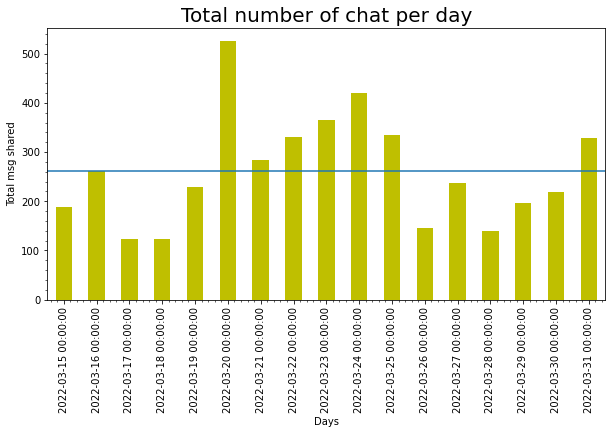

In [56]:
#plot total number of chat per day
days = data.groupby('Date')['Chats'].count()
fig,ax= plt.subplots()
days.plot(kind = 'bar',ax=ax, color='y',figsize=(10,5))

plt.minorticks_on()
ax.tick_params(axis='x',which='minor',bottom='off')
ax.set_xlabel("Days")
ax.set_ylabel("Total msg shared")
ax.set_title(("Total number of chat per day"), fontsize=20)

# use axhline
mean = days.mean()
ax.axhline(mean)

In [57]:
#total chats shared over the period
total_msg = data['Chats'].count()
total_msg

4452

### HOW MANY DAYS

In [58]:
#total day of data
total_days = data['Date'].nunique()
total_days

17

### SPLIT OF LANGUAGE USED OVER THE PERIOD

<AxesSubplot:xlabel='Date'>

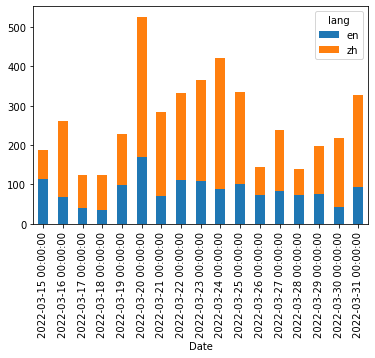

In [59]:
#some stats over language per day 
data.groupby(['Date', 'lang']).size().unstack().plot(kind='bar', stacked=True)

### TYPE OF MESSAGES SENT

<AxesSubplot:xlabel='Date'>

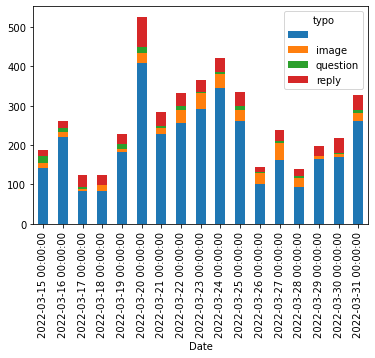

In [60]:
#some stats over typo used
data.groupby(['Date', 'typo']).size().unstack().plot(kind='bar', stacked=True)

### GOV BEING AT MENTIONNED - lady called secretary Song : 宋叶萍 added to the chat for gov announcements

In [61]:
#HOW MANY TIMES GOV BEEN AT MENTIONNED
gov_at_mentionned = data['Chats'].str.contains('@宋叶萍').sum()
print('The governement liaison lady was called out on question ', gov_at_mentionned,' times')

The governement liaison lady was called out on question  87  times


### HOW MANY TIMES GOV LADY SPOKE

In [62]:
#How many times did gov speak
gov_msg = data['name'].str.contains('宋叶萍').sum()
print('The governement liaison lady spoke only ', gov_msg,' times')

The governement liaison lady spoke only  64  times


### WHEN WAS THE LAST TIME SHE SPOKE

In [63]:
gov_msg = data[data['name'].str.contains('宋叶萍')]
gov_msg.tail()

,Date,time,name,Chats,lang,typo
2688,2022-03-24,19:05,宋叶萍,全镇都没出来,zh,
2691,2022-03-24,19:05,宋叶萍,要解封肯定是一起的,zh,
2692,2022-03-24,19:05,宋叶萍,同时间各小区解封,zh,
2696,2022-03-24,19:06,宋叶萍,以小区为单位,zh,
2722,2022-03-24,19:11,宋叶萍,核酸报告出来以后该接的接该封的封,zh,


### OCCURRENCE OF HER MESSAGES 

In [64]:
#Grace how many msg yesterday
chris = data[data['Date'] == '2022-03-23']
chris2 = chris['name'].str.contains('Grace').sum()
chris2

47

In [65]:
chris = chris[(chris["name"].str.contains('Grace') == True) | (chris["Chats"].str.contains('duck') == True)]
chris

,Date,time,name,Chats,lang,typo
2067,2022-03-23,00:10,幸子(Grace),等0点做啥？,zh,
2074,2022-03-23,08:00,幸子(Grace),Jack 08:02,en,
2077,2022-03-23,08:07,幸子(Grace),感觉小区解封有望[Tongue],zh,
2087,2022-03-23,08:19,幸子(Grace),其实不太看得懂 但是大概明白政策有很大变化。一般政策变化都需要大量论证，专家介入，然后流程确认，这么快变了这么多，感觉他们都没有睡觉吧[Facepalm],zh,
2090,2022-03-23,08:24,幸子(Grace),我觉得张医生说的很清楚,zh,
2092,2022-03-23,08:25,幸子(Grace),[Images: 08bb6479f0b63c5485af43f0fec6812f.jpg(View in attachment)],en,image
2093,2022-03-23,08:25,幸子(Grace),[Images: 955785e9820299f60775ccffc8909346.jpg(View in attachment)],en,image
2094,2022-03-23,08:25,幸子(Grace),[Images: 9d89a9297d8a00ae4a51d1a1f750338c.jpg(View in attachment)],en,image
2095,2022-03-23,08:25,幸子(Grace),[Images: 7f442c1d5efaa083b226c8bedec12eb5.jpg(View in attachment)],en,image
2096,2022-03-23,08:27,幸子(Grace),凡是持久的，必是温和可持续的,zh,
